In [1]:
import pandas as pd
import numpy as np

In [55]:
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CS4022 - Social Media Mining\Assignments\Assignment 2 - Customer Review Mining Project\data\dataset.csv"
dataset = pd.read_csv(path)
dataset['summary'] = dataset['summary'].astype(str)
dataset['summary'] = dataset['reviewText'].astype(str)
dataset.head()

,summary,reviewText,asin,brand,sentiment,reviewId
0,If you've been wanting to learn how to create ...,If you've been wanting to learn how to create ...,0321719816,Peach Pit Press,POS,1
1,I waited to complete the entire course before ...,I waited to complete the entire course before ...,0321719816,Peach Pit Press,NEU,2
2,As someone who has just upgraded from Lightroo...,As someone who has just upgraded from Lightroo...,0321700945,Peach Pit Press,POS,3
3,There are over 100 video lessons here. Most us...,There are over 100 video lessons here. Most us...,0321700945,Peach Pit Press,NEU,4
4,This was the first Learn by Video series cours...,This was the first Learn by Video series cours...,0321719824,Peach Pit Press,POS,5


In [13]:
hold_out = [4437, 4434, 4439]
dataset.drop(hold_out, inplace =True)

### generate topics

In [25]:
from top2vec import Top2Vec
model = Top2Vec(documents=(dataset['summary']+". "+dataset['reviewText']).tolist(), speed="learn", workers=8)

2022-11-10 19:07:55,095 - top2vec - INFO - Pre-processing documents for training
2022-11-10 19:07:58,359 - top2vec - INFO - Creating joint document/word embedding
2022-11-10 19:09:04,260 - top2vec - INFO - Creating lower dimension embedding of documents
2022-11-10 19:09:09,391 - top2vec - INFO - Finding dense areas of documents
2022-11-10 19:09:09,578 - top2vec - INFO - Finding topics


In [5]:
dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_assign_documents_to_topic',
 '_calculate_documents_topic',
 '_calculate_topic_sizes',
 '_check_document_index_status',
 '_check_hnswlib_status',
 '_check_import_status',
 '_check_model_status',
 '_check_word_index_status',
 '_create_topic_vectors',
 '_deduplicate_topics',
 '_embed_documents',
 '_embed_query',
 '_find_topic_words_and_scores',
 '_get_combined_vec',
 '_get_document_ids',
 '_get_document_indexes',
 '_l2_normalize',
 '_less_than_zero',
 '_reorder_topics',
 '_search_vectors_by_vector',
 '_unassign_documents_from_topic',
 '_validate_doc_ids',
 '_validate_document_ids_add_doc',
 '_validate_documents',
 '_valida

In [61]:
topic_words[1]

array(['video', 'editing', 'movie', 'photo', 'videos', 'videostudio',
       'photoshop', 'effects', 'studio', 'movies', 'audio', 'elements',
       'editor', 'animation', 'transitions', 'paint', 'pinnacle', 'corel',
       'titles', 'capture', 'paintshop', 'adobe', 'artistic', 'clips',
       'drawing', 'motion', 'cyberlink', 'painting', 'youtube',
       'photography', 'brushes', 'imovie', 'amateur', 'dvd', 'film',
       'photos', 'timeline', 'burning', 'tools', 'painter', 'music',
       'tutorials', 'rendering', 'avi', 'powerdirector', 'poser',
       'images', 'roxio', 'fun', 'blu'], dtype='<U13')

In [31]:
topic_words, word_scores, topic_nums = model.get_topics(34)

In [35]:
for tw in topic_words:
    print(tw[:5])


['virus' 'protection' 'anti' 'security' 'viruses']
['video' 'editing' 'movie' 'photo' 'videos']
['tax' 'taxes' 'turbotax' 'turbo' 'return']
['vista' 'xp' 'core' 'drivers' 'dell']
['wordperfect' 'word' 'office' 'excel' 'powerpoint']
['quicken' 'accounts' 'transactions' 'financial' 'banks']
['renew' 'expired' 'norton' 'mcafee' 'webroot']
['chat' 'hung' 'told' 'waited' 'call']
['accounting' 'sage' 'peachtree' 'inventory' 'payroll']
['acronis' 'backups' 'backup' 'restore' 'ghost']
['trips' 'streets' 'maps' 'gps' 'trip']
['dragon' 'dictate' 'dictation' 'naturally' 'speech']
['rosetta' 'stone' 'language' 'spanish' 'immersion']
['arrived' 'ordered' 'item' 'perfectly' 'activated']
['windows' 'metro' 'awkward' 'desktop' 'classic']
['ancestry' 'tree' 'genealogy' 'family' 'ftm']
['modem' 'router' 'wireless' 'ubuntu' 'cable']
['drew' 'nancy' 'game' 'puzzles' 'secret']
['willmaker' 'nolo' 'attorney' 'legal' 'estate']
['port' 'cable' 'ports' 'nas' 'usb']
['brands' 'honestly' 'brand' 'convenience' 'b

In [62]:
word_scores.shape

(34, 50)

In [32]:
topic_similarity_scores = (model.document_vectors@model.topic_vectors.T)

### save

In [43]:
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CS4022 - Social Media Mining\Assignments\Assignment 2 - Customer Review Mining Project\data\topic_words.npy"
with open(path, 'wb') as f:
    np.save(f, topic_words)

In [42]:
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CS4022 - Social Media Mining\Assignments\Assignment 2 - Customer Review Mining Project\data\word_scores.npy"
with open(path, 'wb') as f:
    np.save(f, word_scores)

In [41]:
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\Semester 1\CS4022 - Social Media Mining\Assignments\Assignment 2 - Customer Review Mining Project\data\topic_similarity_scores.npy"
with open(path, 'wb') as f:
    np.save(f, topic_similarity_scores)

In [44]:
dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_assign_documents_to_topic',
 '_calculate_documents_topic',
 '_calculate_topic_sizes',
 '_check_document_index_status',
 '_check_hnswlib_status',
 '_check_import_status',
 '_check_model_status',
 '_check_word_index_status',
 '_create_topic_vectors',
 '_deduplicate_topics',
 '_embed_documents',
 '_embed_query',
 '_find_topic_words_and_scores',
 '_get_combined_vec',
 '_get_document_ids',
 '_get_document_indexes',
 '_l2_normalize',
 '_less_than_zero',
 '_reorder_topics',
 '_search_vectors_by_vector',
 '_unassign_documents_from_topic',
 '_validate_doc_ids',
 '_validate_document_ids_add_doc',
 '_validate_documents',
 '_valida

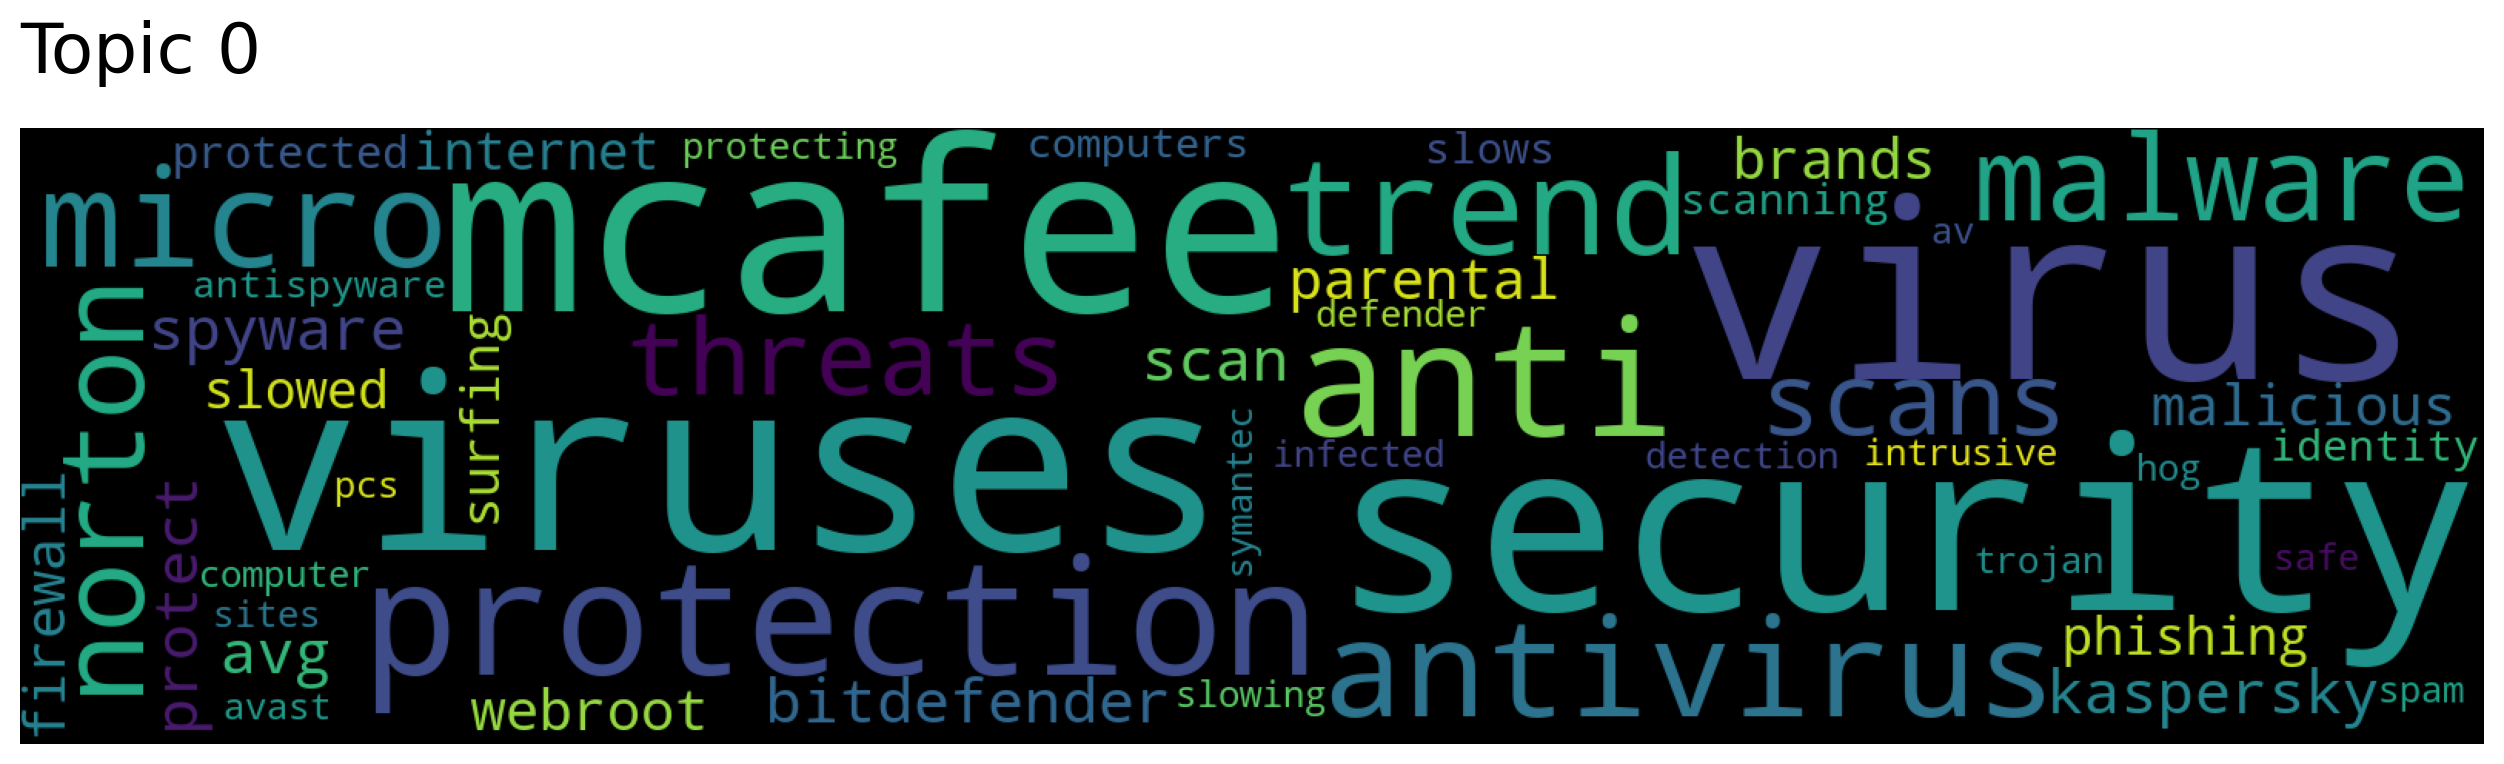

In [47]:
model.generate_topic_wordcloud(0)

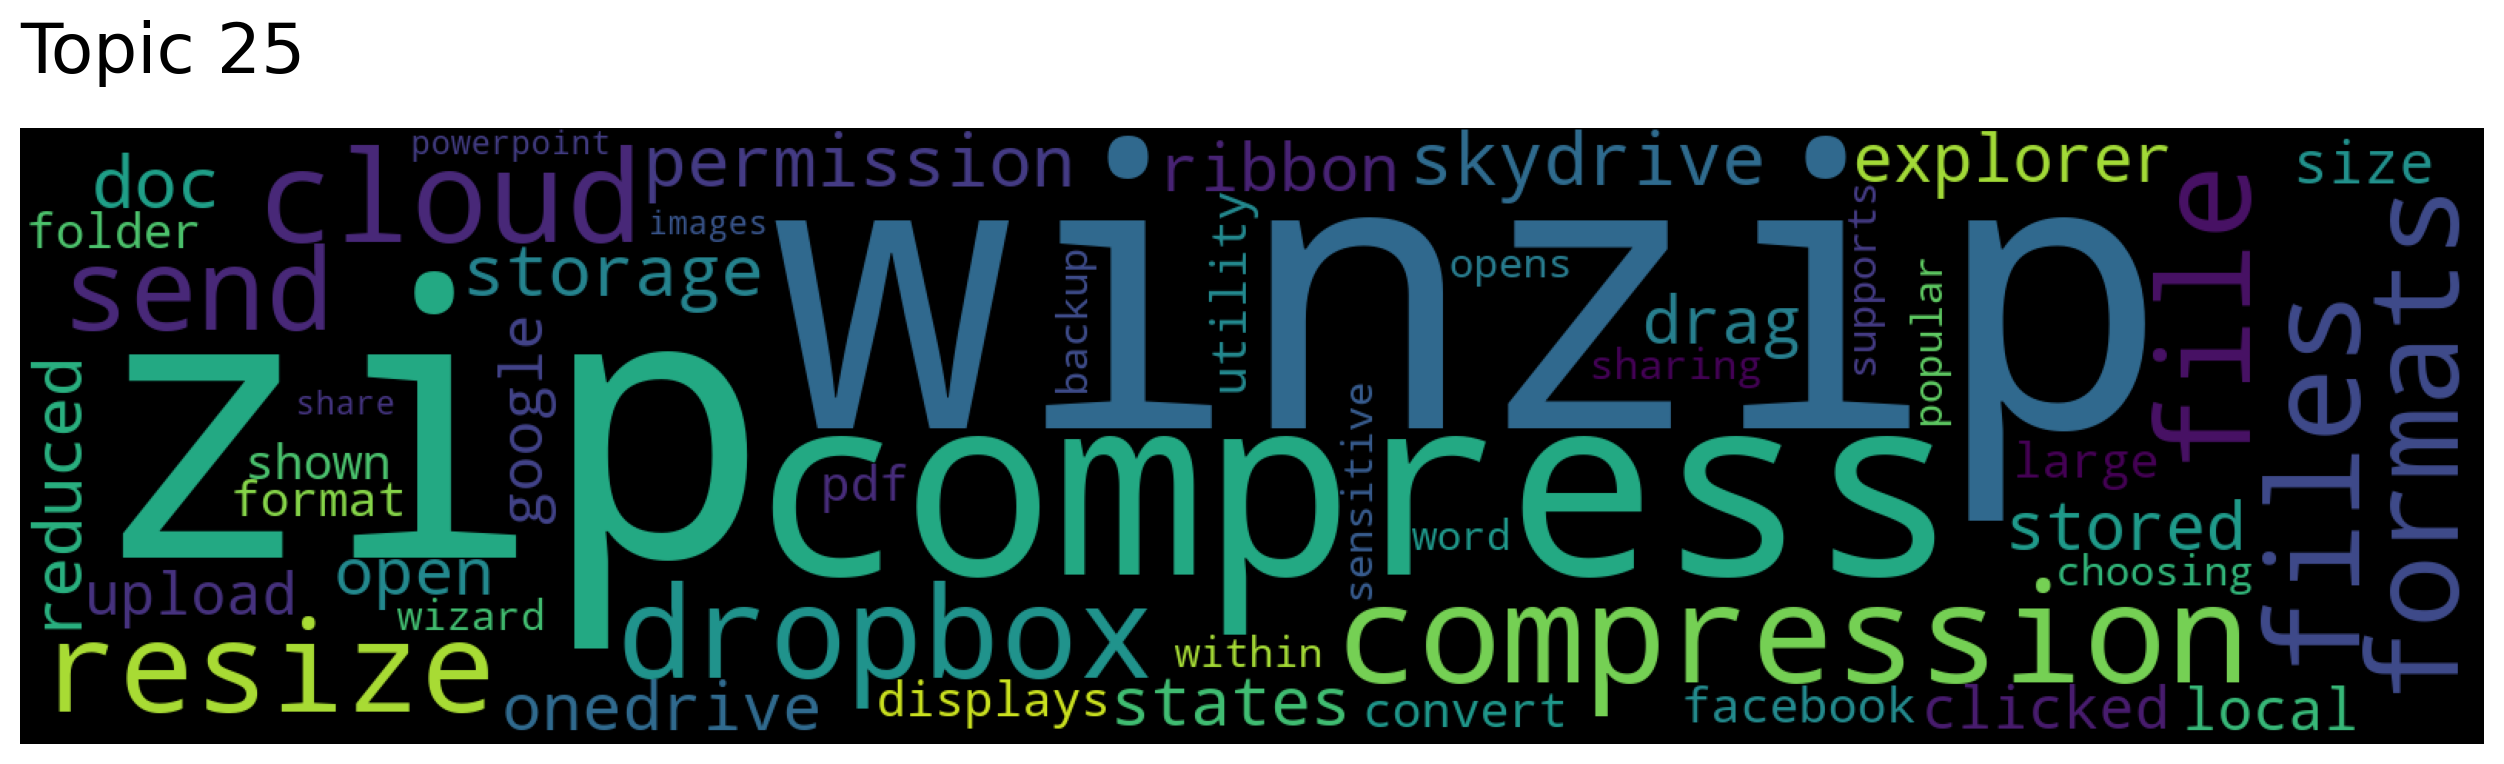

In [48]:
model.generate_topic_wordcloud(25)

In [17]:
model.search_documents_by_topic(35, 10)

(array(['EXCELLENT. EXCELLENT', 'excellent. excellent',
        'Excellent Seller and Product!. Excellent Seller and Product!',
        'EXCELLENT. EXCELLENT', 'Excellent. Excellent',
        'Excellent. Excellent', 'Excellent!. Excellent!',
        'Excellent product. Excellent product',
        'Very useful and excellent article.. Very useful and excellent article.',
        'Excellent app.. Excellent app.'], dtype=object),
 array([0.92357385, 0.9155184 , 0.9036369 , 0.90038425, 0.88730216,
        0.8813952 , 0.85945845, 0.85938984, 0.7466527 , 0.7254108 ],
       dtype=float32),
 array([  54,   57,   55,  308, 3037,  589, 2808,  309, 2126, 3710]))

In [18]:
model.search_documents_by_topic(6, 10)

(array(["Corel PaintShop Photo Express 2010 is  very basic program that wasn't what I thought it was.  It doesn't provide the user with enough tools to edit photos the way I had hoped.. Corel PaintShop Photo Express 2010 is  very basic program that wasn't what I thought it was.  It doesn't provide the user with enough tools to edit photos the way I had hoped.",
        "I got this Corel PaintShop Pro X7 hoping it would be a good alternative to Photoshop. I'll warn you that this is a pretty complex program and there is no way you could possibly list all the features included in it. But here are the most interesting ones:BASIC FUNCTIONS- This a highly functional photo processing software.- It comes with lots of fun and practical built-in filters.- You can crop, straighten, fix red eye, add text, convert to black and white or adjust colors/saturationADVANCED FUNCTIONS- You can clone items- Remove scratches  and unwanted objects- Apply special effects like time warp (to make photos look ol

In [47]:
model.search_topics(query, num_topics = 1)

([array(['winzip', 'zip', 'compress', 'compression', 'cloud', 'files',
         'dropbox', 'file', 'resize', 'formats', 'send', 'skydrive',
         'storage', 'doc', 'permission', 'explorer', 'states', 'reduced',
         'stored', 'onedrive', 'open', 'ribbon', 'drag', 'upload', 'size',
         'local', 'google', 'clicked', 'displays', 'utility', 'pdf',
         'facebook', 'convert', 'folder', 'shown', 'format', 'large',
         'choosing', 'wizard', 'opens', 'supports', 'sensitive', 'sharing',
         'popular', 'within', 'backup', 'word', 'powerpoint', 'share',
         'images'], dtype='<U13')],
 [array([0.75574833, 0.71922576, 0.608237  , 0.539257  , 0.37482032,
         0.3722156 , 0.36355585, 0.36267588, 0.3361689 , 0.29262796,
         0.2920932 , 0.28457922, 0.25122288, 0.2472479 , 0.24693766,
         0.24321063, 0.23814355, 0.22912066, 0.22172424, 0.22085428,
         0.21997923, 0.21635358, 0.2161627 , 0.21479782, 0.21425037,
         0.21090057, 0.21030644, 0.20913309,

In [40]:
model.search_documents_by_keywords(query, num_docs = 5)  #, search_topics

(array(["WinZip is useful as it's ubiquitous, files can be unzipped by anyone, which makes it a good tool to manage and email large files. Of course, it's also useful to be able to zip them to store them in the Cloud, especially if you have the free versions and have much less storage space. It also allows you to carry multiple files on SD cards or USB drive or even your tablet.This version of WinZip connects directly to Dropbox, Google Drive etc so you can use it to organize all your cloud files at once. A password can be set for encrypted files for security.It also converts files to PDF, a useful feature for me, I have been using the free PrimoPDF so far. It can also create a read only PDF that is useful for things like resumes. I have only tried it with Microsoft office files so far.Overall, useful but also a little glitchy, if I did not have large files to compress I would keep using the free version.. WinZip is useful as it's ubiquitous, files can be unzipped by anyone, which make

In [39]:
query = "useful tool to compress files".split()

In [42]:
dataset[dataset.reviewText.apply(lambda text: "WinZip is useful as it's ubiquitous, fil" in text)]

,summary,reviewText,asin,brand,sentiment,reviewId
4403,"WinZip is useful as it's ubiquitous, files can...","WinZip is useful as it's ubiquitous, files can...",B00GDF84IG,Corel,NEU,4404


In [53]:
hold_out[0]

4437

In [59]:
model.query_topics(dataset.iloc[hold_out[0]].summary, num_topics = 1)

([array(['video', 'editing', 'movie', 'photo', 'videos', 'videostudio',
         'photoshop', 'effects', 'studio', 'movies', 'audio', 'elements',
         'editor', 'animation', 'transitions', 'paint', 'pinnacle', 'corel',
         'titles', 'capture', 'paintshop', 'adobe', 'artistic', 'clips',
         'drawing', 'motion', 'cyberlink', 'painting', 'youtube',
         'photography', 'brushes', 'imovie', 'amateur', 'dvd', 'film',
         'photos', 'timeline', 'burning', 'tools', 'painter', 'music',
         'tutorials', 'rendering', 'avi', 'powerdirector', 'poser',
         'images', 'roxio', 'fun', 'blu'], dtype='<U13')],
 [array([0.502509  , 0.4856944 , 0.43260178, 0.41479388, 0.40530023,
         0.39919716, 0.39555198, 0.39400178, 0.39241368, 0.38247675,
         0.3760726 , 0.3729896 , 0.36109504, 0.35648575, 0.35329115,
         0.35293737, 0.35026526, 0.34955552, 0.34946382, 0.34835732,
         0.34739426, 0.34696093, 0.34491837, 0.344414  , 0.34371236,
         0.340202  , 0.3

In [57]:
dataset.iloc[hold_out[0]].summary

"I am a total amateur when it comes to editing, but needed to try something for editing the photos I take for my business.This software was a quick and easy download.  Once downloaded, I was able to start using it pretty quickly, the learning curve was one that I could understand without too much trial and error.I take many photos of different items in the same location, so when I need to edit, it's generally the same thing which needs editing, this software is perfect for that.  Now I can fix multiple photos at one time, saving a lot of time!The price is great if you're not sure about the program, not a huge expense like many others out there.For me, and my level of expertise, or lack of it, this program fits the bill!"

In [64]:
model.word_vectors.shape

(2574, 300)